In [1]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


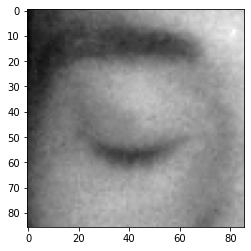

In [8]:
Datadirectory =  "C:/Users/MrLaptop/Desktop/Eye DataSet/Training Data"
Classes = ["Closed Eyes","Opened Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        image_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(image_array,cmap = "gray")
        plt.show()
        break
    break

In [2]:
training_data = []
image_size = 224

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        Class_number = Classes.index(category) #0,1
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(image_size,image_size))
                training_data.append([new_array,Class_number])
            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
print(len(training_data))

2516


In [12]:
import random   # to avoid overfitting
random.shuffle(training_data)

In [13]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,image_size,image_size,3) #converting into rgb


In [14]:
X.shape



(2516, 224, 224, 3)

In [15]:
X = X/255.0

In [16]:
Y = np.array(y)

In [11]:
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [22]:
import pickle
pickle_in = open('x.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('Y.pickle','rb')
y = pickle.load(pickle_in)

EOFError: Ran out of input

#now we will train the deep learning model

In [3]:
from tensorflow.keras import layers

In [4]:
model = tf.keras.applications.mobilenet.MobileNet()

In [5]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

#Transfer learning implementation

In [6]:
base_input = model.layers[0].input   ##input layer

In [7]:
base_output = model.layers[-4].output  #dropout layer

In [8]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) #1 node(1/0)
final_output = layers.Activation('sigmoid')(final_output)


In [9]:
from tensorflow import keras
new_model = keras.Model(inputs = base_input, outputs = final_output)


In [10]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

#settings for binary classification (open/closed)

In [11]:
new_model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [22]:
new_model.fit(X,Y, epochs = 1,validation_split =0.1)  #training

71/71 [==============================] - 712s 10s/step - loss: 0.1905 - accuracy: 0.9303 - val_loss: 13.6845 - val_accuracy: 0.4762


In [26]:
new_model.save('C:/Users/MrLaptop/Desktop/7th Semester/Artificial Intelligence/AI_Project/mmy_model.h5')

In [12]:
from tensorflow import keras
new_model = tf.keras.models.load_model('C:/Users/MrLaptop/Desktop/7th Semester/Artificial Intelligence/AI_Project/my_model.h5')

#checking for the predictions

In [13]:
image_array = cv2.imread("C:/Users/MrLaptop/Desktop/Eye DataSet/Testing Data/s0012_07322_0_0_1_0_1_01.png",cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(image_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(image_size,image_size))

In [14]:
X_input = np.array(new_array).reshape(1,image_size,image_size,3)

In [15]:
X_input.shape

(1, 224, 224, 3)

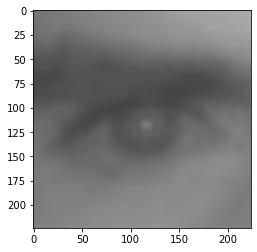

In [16]:
plt.imshow(new_array)

In [17]:
X_input = X_input/255.0

In [18]:
prediction = new_model.predict(X_input)

In [19]:
prediction

array([[0.9999999]], dtype=float32)

#now lets check this on an unknown image

In [20]:
image = cv2.imread("C:/Users/MrLaptop/Desktop/7th Semester/Artificial Intelligence/AI_Project/Women.jpg")

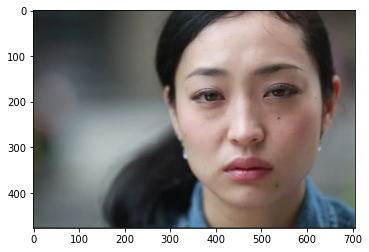

In [21]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [22]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

In [23]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

In [24]:
print( faceCascade.empty() )
print(eye_cascade.empty())

False
False


In [25]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [26]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [27]:
for (x,y,w,h) in eyes:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    

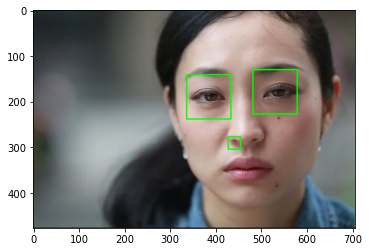

In [28]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

#Cropping the eye image

In [29]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = image[y:y+h,x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print('The eyes are not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]



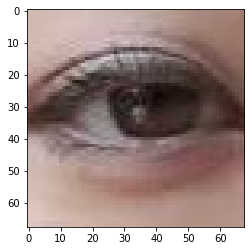

In [30]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [31]:
eyes_roi.shape


(68, 68, 3)

In [32]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image.shape

(1, 224, 224, 3)

In [33]:
new_model.predict(final_image)


array([[1.]], dtype=float32)

#Real time Live video Demo 

In [ ]:
import cv2
import numpy as np
import winsound
frequency = 2500 #setting the frquency to 2500 hertz
duration = 1000  #setting the duration to 1000ms which is equivalent to 1 sec
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
#checking if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open the webcam")
    
counter = 0

while True:
    ret,frame = cap.read()
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes = eyes_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print('The eyes are not detected')
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
                
   
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    #draw a rectangle around the faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
    font =cv2.FONT_HERSHEY_SIMPLEX
    
    font = cv2.FONT_HERSHEY_SIMPLEX        
    final_image = cv2.resize(eyes_roi,(224,224))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions>0.5):
        status ="Open Eyes"
        cv2.putText(frame,status,(150,150),font,3,(0,255,0),2,cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
       
        #adding the text in it
        cv2.putText(frame,'Active',(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        #drawing the backgroud rectangle
        cv2.rectangle(frame,(x1,x1),(x1 + w1,y1 + h1),(0,0,0),-1)
    else:
        counter = counter +1
        status = "Closed Eyes"
        cv2.putText(frame,status,(150,150),font,3,(0,255,0),2,cv2.LINE_4)
        #drawing the backgroud rectangle
        cv2.rectangle(frame,(x,y),(x + w,y + h),(0,0,255),2)
        if counter>5:
            x1,y1,w1,h1  =0,0,175,75
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),2)
            #adding the text in it
            cv2.putText(frame,'Sleep Alert',(x1 + int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
            winsound.Beep(frequency,duration)
            counter = 0
        
        
        
        
        
        

    cv2.imshow('Drowsiness detection',frame)
    if cv2.waitKey(2) &0xFF == ord('q'):
        break
    
    
cap.release()
cv2.destroyAllWindows()
    
    

False
The eyes are not detected
False
The eyes are not detected
False
The eyes are not detected
False
The eyes are not detected
False
False
The eyes are not detected
False
The eyes are not detected
The eyes are not detected
False
The eyes are not detected
False
False
False
The eyes are not detected
False
The eyes are not detected
False
False
The eyes are not detected
False
False
False
False
The eyes are not detected
False
The eyes are not detected
False
The eyes are not detected
False
The eyes are not detected
False
The eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
The eyes are not detected
False
The eyes are not detected
False
The eyes are not detected
The eyes are not detected
False
False
The eyes are not detected
False
False
False
False
False
False
False
The eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
The eyes are n